<a href="https://colab.research.google.com/github/SAyaanHussain/GreenSync/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ssl
from sklearn.datasets import fetch_openml

In [ ]:
import ssl
from sklearn.datasets import fetch_openml
ssl._create_default_https_context = ssl._create_unverified_context
mnist = fetch_openml('mnist_784', as_frame=False)

# Explore and **Visualize** the Data 📊💪

In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
import matplotlib.pyplot as plt

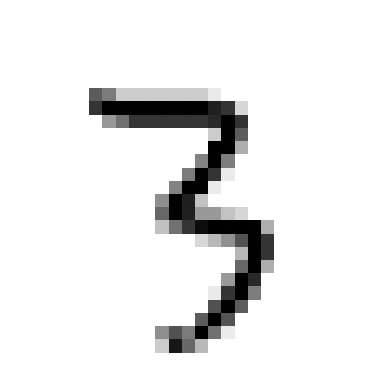

In [ ]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[44]
plot_digit(some_digit)

In [ ]:
y[44]

'3'

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# TTS -> Test Train Split
# Means to divide data into testing, training parts , here first 60,000 images are used as training and rest 10,000 are for testing

# **BINARY CLASSIFICATION (building a 3-detector)**

In [ ]:
# BINARY CLASSIFIER (Classifies between only 2 classes)

In [ ]:
# PROGRAM: 3-detector -> 10/10 :D
yt3 = (y_train=='3') # returns true for all 3s but false otherwise...
ytest3 = (y_test=='3')

In [ ]:
from sklearn.linear_model import SGDClassifier # stochastic gradient descent (GOOD BINARY CLASSIFIER)

In [ ]:
c = SGDClassifier(random_state=42)

In [ ]:
c.fit(X_train, yt3)

SGDClassifier(random_state=42)

In [ ]:
c.predict([some_digit])

array([ True])

# **Performance Measure of Binary Classifier using Cross Validation**

In [ ]:
# Performace check using CROSS VALIDATION (checks accuracy by testing your model on different subsets of dataset)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(c,X_train, yt3, cv=3,scoring="accuracy") # our accuracy = 95% which is great

array([0.9496 , 0.9624 , 0.96275])

In [ ]:
# Accuracy is not a good performance measure for classifiers. If you were to load a dummy dataset and substitute it for
# the sgdclassifier, it would return false when you predict but when you check the accuracy it would be around 85-90%

In [ ]:
# A better method is Confusion Matrix

# **CONFUSION MATRIX**

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
# Cross val predict -> generates predictions for each data point (n) so it does n fold cross validation (return confusion matrix)
# cross val score -> evaluates the model's performance metrics during cross validation

In [ ]:
p = cross_val_predict(c,X_train,yt3,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix = confusion_matrix(yt3,p)

In [ ]:
matrix

array([[53477,   392],
       [ 2113,  4018]])

In [ ]:
# 53477 -> CORRECTLY CLASSIFIED (TRUE) AS NON-3S (NEGATIVE), thus True Negative (TN)
# 392 -> WRONGLY CLASSIFIED (FALSE) AS 3S (POSITIVE), thus False Positive (FP)
# 2113 -> WRONGLY CLASSIFIED (FALSE) AS NON-3S (NEGATIVE), thus Flase Negative (FN)
# 4018 -> CORRECTLY CLASSIFIED (TRUE) AS 3S (POSITIVE), thus True Positive

In [ ]:
# Thus a Binary Classifier always returns a confusion matrix in the form of:
# TN FP
# FN TP

In [ ]:
# PRECISION = TP/(TP+FP)
# PRECISION = 4018/(4018+392) = 4018/4410 = 0.911 = 91.1%
# precision -> is the true positive rate (TPR)

In [ ]:
from sklearn.metrics import precision_score, recall_score
# Recall -> is the sensitivity

In [ ]:
precision_score(yt3,p)*100

91.11111111111111

In [ ]:
# Recall = TP/(TP+FN)
# Recall = 4018/(4018+2113) = 4018/6131 = 0.6553 = 65.53%

In [ ]:
recall_score(yt3,p)*100

65.5358016636764

In [ ]:
# Now precision score + recall in one single metric is called F1 score
# precision = p, recall = r
# F1 = 2/(1/p + 1/r) = 2(pxr/(p+r)) = TP/(TP+(FN+FP)/2)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(yt3,p)

0.7623565126648325

# **MULTICLASS CLASSIFICATION**

In [ ]:
# Multinomial Classification (Can distinguish between more than 2 classes whereas binary classifers distinguish between only 2 classes)

In [ ]:
# Binary classifiers -> Stochastic Gradient Descent Classifier, SVC which stands for support vector classifier and works on support vector machines (SVM)
# SVM -> Stands for support vector machine which is a supervised machine learning algorithm used for both regression and classification problems
# it works by classifying the data by finding the hyperplane (decision boundary between data points of various classes such that the distance is maximized.

In [ ]:
# Strategies (OvA, OvO)
input as image of 8
OvO -> One vs One
OvR or OvA -> One vs Rest or One vs All
Strategy OvO:
Class 0 vs Class 1
0,1 (+1 vote for 0)
0,2 (+1 vote for 2)
0,3....0,9
1,2
1,3
1,4,
...1,9
8 has the highest votes of 15

OvR:
Class 0: 0.6
Class 1: 0.2
...Class 8: 0.98
Class 9: 0.8
max score wins, class 8 is the answer and its correct

SyntaxError: invalid syntax (<ipython-input-1-983322b27236>, line 2)

In [ ]:
# Using SVC and training uisng ORIGINAL classes from 0-9
from sklearn.svm import SVC
sc = SVC(random_state=42)
sc.fit(X_train[:1000], y_train[:1000])

SVC(random_state=42)

In [ ]:
sc.predict([some_digit])

array(['3'], dtype=object)

In [ ]:
sco = sc.decision_function([some_digit])

In [ ]:
sco.round(2) # highest score was 9.3 corresponding to 3

array([[-0.29,  2.84,  3.99,  9.3 ,  1.75,  8.23,  0.73,  6.21,  7.19,
         5.18]])

In [ ]:
checkid = sco.argmax()
checkid

3

In [ ]:
sc.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
sc.classes_[checkid]

'3'

In [ ]:
# Forcing sklearn to use OvR or OvO rather than it detecting on its own
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(SVC(random_state=42))
ovr.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
# Make prediction
ovr.predict([some_digit])

array(['3'], dtype='<U1')

In [ ]:
len(ovr.estimators_)

10

In [ ]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
sgd.predict([some_digit])

array(['3'], dtype='<U1')

# **ERROR ANALYSIS**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
p2 = cross_val_score(sgd,X_train,y_train,cv=3,scoring="accuracy")

In [ ]:
p2

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [ ]:
cross_val_score(sgd,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

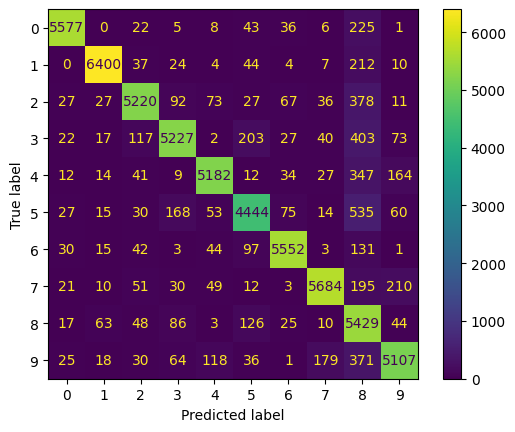

In [ ]:
yp2 = cross_val_predict(sgd, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, yp2)